# Activities Analysis
In this notebook we'll analyze the Google "Activities" data using [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/).

In [1]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import pandas as pd

# Set this to the name of your activities file
ACTIVITIES_PATH = 'activities.csv'
# Optional: configure the start and end dates of data you want to consider, e.g. date(2020, 1, 1)
START_DATE = None
END_DATE = None
# Optional: configure whether to exclude data that is low confidence
EXCLUDE_LOW_CONFIDENCE = True

In [2]:
activities = pd.read_csv(ACTIVITIES_PATH, sep='|', encoding='utf-8', parse_dates=['start_timestamp', 'end_timestamp'])
print(f'Original data has {activities.shape[0]} rows and {activities.shape[1]} columns.')

# Filter out rows that don't match the configured settings
if START_DATE:
    activities = activities[activities['start_timestamp'].dt.date >= START_DATE]
if END_DATE:
    activities = activities[activities['end_timestamp'].dt.date <= END_DATE]
if EXCLUDE_LOW_CONFIDENCE:
    activities = activities[activities['confidence'] != 'LOW']

print(f'Filtered data has {activities.shape[0]} rows and {activities.shape[1]} columns.')
activities.head()

Original data has 2746 rows and 10 columns.
Filtered data has 2473 rows and 10 columns.


,start_lat_e7,start_lon_e7,end_lat_e7,end_lon_e7,start_timestamp,end_timestamp,distance,activity_type,confidence,travel_distance
0,423941900,-711423034,424628359,-712394941,2020-02-29 21:29:18.718000+00:00,2020-02-29 21:43:16+00:00,16228.0,IN_PASSENGER_VEHICLE,HIGH,17336.343582
1,424625171,-712394748,424465691,-712345327,2020-06-15 19:15:01.393000+00:00,2020-06-15 19:33:27.865000+00:00,1819.0,IN_PASSENGER_VEHICLE,MEDIUM,2335.875677
2,424469119,-712348917,424624109,-712493704,2020-06-15 21:25:47.776000+00:00,2020-06-15 21:29:48.845000+00:00,2093.0,IN_PASSENGER_VEHICLE,HIGH,2851.761028
3,424656105,-712131751,424609243,-711637293,2020-06-20 18:38:19.681000+00:00,2020-06-20 18:48:09.499000+00:00,NaN,IN_PASSENGER_VEHICLE,HIGH,4353.524412
4,424609821,-711636176,424607915,-712214341,2020-06-20 20:04:03.594000+00:00,2020-06-20 20:12:22.757000+00:00,5142.0,IN_PASSENGER_VEHICLE,HIGH,8032.899733


In [3]:
print('Number of records, by level of confidence')
activities['confidence'].value_counts()

Number of records, by level of confidence


HIGH      2167
MEDIUM     306
Name: confidence, dtype: int64

In [4]:
print('Number of records, by activity type:')
activities['activity_type'].value_counts()

Number of records, by activity type:


WALKING                 1490
CYCLING                  466
IN_PASSENGER_VEHICLE     242
IN_TRAIN                 171
IN_TRAM                   38
IN_BUS                    24
IN_SUBWAY                 19
RUNNING                   18
FLYING                     5
Name: activity_type, dtype: int64

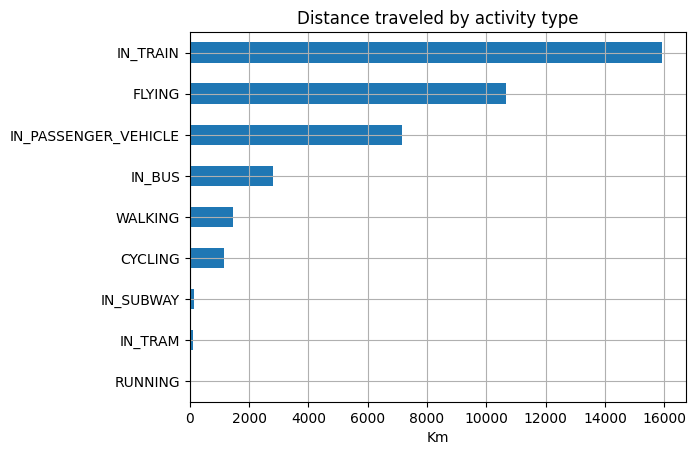

In [5]:
# Calculate travel distance (km) by activity type.
distance = activities.groupby('activity_type')['travel_distance'].sum() / 1000
distance.sort_values(inplace=True)

ax = distance.plot.barh()
ax.set_title('Travel distance by activity type')
ax.set_xlabel('Km')
ax.set_ylabel('')
ax.grid()

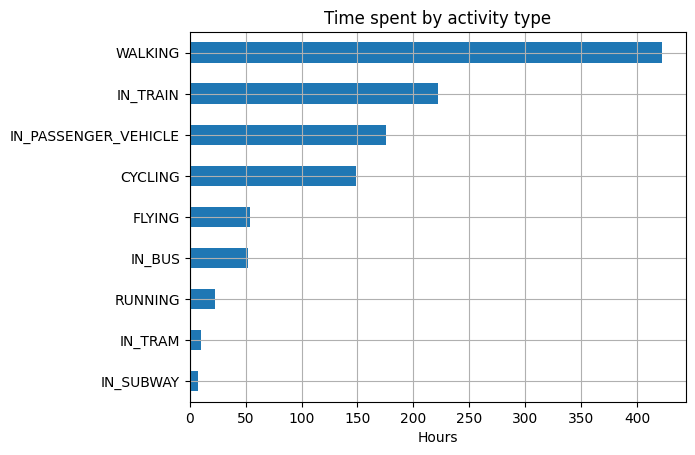

In [6]:
# Calculate total travel time (hours) by activity type.
activities['duration'] = activities['end_timestamp'] - activities['start_timestamp']
time_spent = activities.groupby('activity_type')['duration'].sum().dt.total_seconds() / 3600
time_spent.sort_values(inplace=True)

ax = time_spent.plot.barh()
ax.set_title('Time spent by activity type')
ax.set_xlabel('Hours')
ax.set_ylabel('')
ax.grid()